<a href="https://colab.research.google.com/github/halen48/image-processing/blob/main/Autoencoder_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dependências

In [ ]:
import numpy as np #NumPy
import tensorflow as tf #TensorFlow - Framework de Aprendizagem de Máquina
import matplotlib.pyplot as plt #MatplotLib - Framework para mostrar imagens

# Dependências do Keras - Framework de Aprendizagem de Máquina
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model

#Pré processamento

O pré processamento consiste em um processamento prévio, que antecede o processamento que temos como objetivo final. Geralmente são utilizadas outras tecnicas conhecidas no âmbito de processamento de imagem. Exemplo:

<img src="https://opendatascience.com/wp-content/uploads/2019/04/22.png">

Para o nosso exemplo, o pré processamento consiste em duas etapas:

##Redimensionamento das imagens
Para um tamanho específico, uma vez que o autoencoder requer dimensões fixas para as imagens.

<img src="https://blog.filestack.com/wp-content/uploads/2019/03/image-resize-blog1.png">

In [ ]:
dimensoes_imagem=(28, 28, 1) #@param

In [ ]:
def reshape(data, shape):
  return np.reshape(data, (len(data), *shape))

##Normalização
Limitar os dados a um intervalo de 0 a 1, a fim de evitar problemas de escala, garantindo que trabalhemos apenas com os valores de pixels na forma de porcentagens.

Note que os valores dos pixels variam entre 0 (preto - desligado) e 255 (branco - ligado).<br>
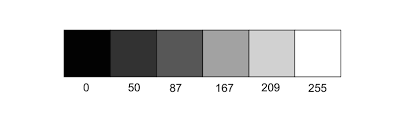

In [ ]:
def normalizacao(data):
  return data.astype("float32") / 255.0

##Pipleline de preprocessamento

In [ ]:
def preprocessamento(data, dimensao):
  data = reshape(data, dimensao)
  data = normalizacao(data)
  return data

#Dados processados

##Display
Essa função é útil para visualizar várias imagens de uma só vez, como, por exemplo, mostrar um conjunto de resultados de processamento de imagens ou saída de um modelo de aprendizado de máquina.

In [ ]:
def display(grupos_images, mostra_imagens):
  indices = np.random.randint(len(grupos_images[0]), size=mostra_imagens)
  for images in [g[indices,:] for g in grupos_images]:
    max_imgs = len(images)
    plt.figure(figsize=(2*max_imgs, 4))
    for i, image in enumerate(images):
        ax = plt.subplot(2, max_imgs, i + 1)
        plt.imshow(image)
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

##Dados de treino/teste
Os dados do conjunto de dados MNIST deve ser carregado em memória e, em seguida, aplica um processo de pré-processamento às imagens de treinamento e teste, armazenando os resultados de volta nas variáveis train_data e test_data. O pré-processamento é importante para preparar os dados para serem usados em algoritmos

In [ ]:
(train_data, train_label), (test_data, test_label) = mnist.load_data()

train_data = preprocessamento(train_data, dimensoes_imagem)
test_data = preprocessamento(test_data, dimensoes_imagem)

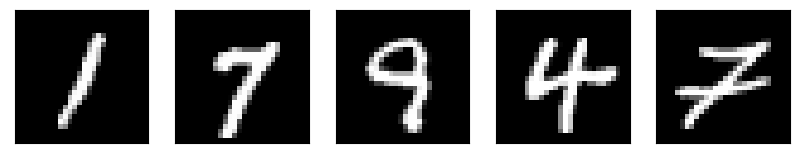

In [ ]:
mostra_imagens = 5 #@param
display([train_data],mostra_imagens)

#Modelo
Um autoencoder é como um "artista" que aprende a desenhar uma imagem complexa observando o menor número possível de traços (codificador), e depois tenta redesenhar a imagem a partir desses traços (decodificador).

<img src="https://miro.medium.com/v2/resize:fit:1400/1*I5MVGIrROrAnD3U_2Jm1Ng.png">

In [ ]:
z = 5 #@param

##Codificador

In [ ]:
def codificador(dimensoes,z):
  entrada = layers.Input(dimensoes)

  x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(entrada)
  x = layers.MaxPooling2D((2, 2), padding="same")(x)
  x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
  x = layers.MaxPooling2D((2, 2), padding="same")(x)
  x = layers.Flatten()(x)
  x = layers.Dense(z, activation='relu')(x)

  return Model(entrada, x)

In [ ]:
m = codificador(dimensoes_imagem,z)
m.summary()

Model: "model_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_24 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 14, 14, 32)        9248      
                                                                 


 max_pooling2d_17 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 1568)              0         
                                                                 
 dense_16 (Dense)            (None, 5)                 7845      
                                                                 
Total params: 17,413
Trainable params: 17,413
Non-trainable params: 0
_________________________________________________________________


##Decodificador

In [ ]:
def decodificador(z,dimensao,cores,ativacao_ultima_camada = 'relu'):
  dim = int(np.sqrt((dimensao)/32))

  entrada = layers.Input(z)
  x = layers.Dense(dimensao)(entrada)
  x = layers.Reshape(target_shape=(dim,dim,32))(x)
  x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
  x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
  x = layers.Conv2D(cores, (3, 3), activation=ativacao_ultima_camada, padding="same")(x)

  return Model(entrada, x)

In [ ]:
decodificador(z,1568, 1).summary()

Model: "model_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, 5)]               0         
                                                                 
 dense_17 (Dense)            (None, 1568)              9408      
                                                                 
 reshape_8 (Reshape)         (None, 7, 7, 32)          0         
                                                                 
 conv2d_transpose_16 (Conv2D  (None, 14, 14, 32)       9248      
 Transpose)                                                      
                                                                 
 conv2d_transpose_17 (Conv2D  (None, 28, 28, 32)       9248      
 Transpose)                                                      
                                                                 
 conv2d_26 (Conv2D)          (None, 28, 28, 1)         289

##AutoEncoder
Essa classe encapsula um modelo de autoencoder, facilitando a criação, treinamento e uso do modelo. Ela inclui um codificador, um decodificador e um modelo completo. O codificador mapeia a entrada para uma representação interna, e o decodificador reconstrói a entrada a partir dessa representação. Essa é uma abordagem comum para tarefas de redução de dimensionalidade e geração de dados.

In [ ]:
class AutoEncoder():
  def __init__(self, dimensoes, z, cores, ativacao_ultima_camada = 'relu'):
    self.dimensoes = dimensoes
    self.z = z

    self.codificador = codificador(dimensoes,z)
    tamanho_saida_cod = self.codificador.layers[-2].output_shape[1]
    self.decodificador = decodificador(z,tamanho_saida_cod, cores, ativacao_ultima_camada)
    saida = self.decodificador(self.codificador.output)

    self.model = Model(self.codificador.input, saida)

  def summary(self):
    self.codificador.summary()
    self.decodificador.summary()

  def compile(self, *args, **kwargs):
    self.model.compile(*args, **kwargs)

  def fit(self, *args, **kwargs):
    self.model.fit(*args, **kwargs)

  def predict(self, *args, **kwargs):
    return self.model.predict(*args, **kwargs)

  def codigo(self,*args, **kwargs):
    return self.codificador.predict(*args, **kwargs)

  def amostra(self,lote):
    return self.decodificador(np.random.rand(lote, self.z)).numpy()

  def __call__(self,entrada):
    return self.model(entrada)

In [ ]:
AE = AutoEncoder(dimensoes_imagem, z, 1)
AE.summary()

Model: "model_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_27 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 1568)              0  

 ```compile``` é usado para configurar a fase de treinamento de um modelo de rede neural. Essa fase de treinamento é onde você especifica como o modelo deve aprender com os dados.

In [ ]:
AE.compile(optimizer="adam", loss="binary_crossentropy", metrics=['mae'])

##Treinamento

In [ ]:
AE.fit(
    x=train_data,
    y=train_data,
    epochs=50,
    batch_size=128,
    shuffle=True,
    validation_data=(test_data, test_data),
)

Epoch 1/50
469/469 [==============================] - 2s 3ms/step - loss: 0.2373 - mae: 0.1310 - val_loss: 0.2004 - val_mae: 0.1127
Epoch 2/50
469/469 [==============================] - 1s 3ms/step - loss: 0.2029 - mae: 0.1115 - val_loss: 0.1903 - val_mae: 0.1056
Epoch 3/50
469/469 [==============================] - 1s 3ms/step - loss: 0.1901 - mae: 0.1042 - val_loss: 0.1817 - val_mae: 0.0991
Epoch 4/50
469/469 [==============================] - 1s 3ms/step - loss: 0.1930 - mae: 0.1050 - val_loss: 0.1835 - val_mae: 0.0996
Epoch 5/50
469/469 [==============================] - 1s 3ms/step - loss: 0.1793 - mae: 0.0964 - val_loss: 0.1776 - val_mae: 0.0964
Epoch 6/50
469/469 [==============================] - 1s 3ms/step - loss: 0.1802 - mae: 0.0959 - val_loss: 0.1823 - val_mae: 0.0995
Epoch 7/50
469/469 [==============================] - 1s 3ms/step - loss: 0.1752 - mae: 0.0937 - val_loss: 0.1696 - val_mae: 0.0893
Epoch 8/50
469/469 [==============================] - 1s 3ms/step - loss: 0.

##Avaliação
O método ```predict``` é usado para fazer previsões com um modelo de rede neural previamente treinado. Ele permite que você forneça dados de entrada ao modelo e obtenha previsões correspondentes como saída.

In [ ]:
resultado = AE.predict(test_data)

313/313 [==============================] - 0s 901us/step


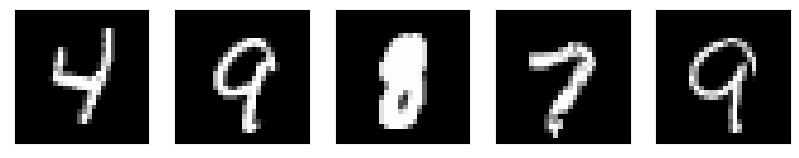

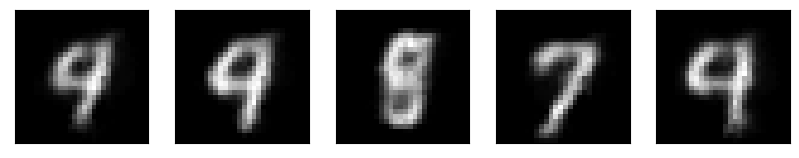

In [ ]:
display([test_data, resultado],mostra_imagens)

##Código
Vamos observar como é o código que o AutoEncoder aprendeu através da extração de caracteristicas durante o treinamento.

O código se concentra na camada de cor laranja desta imagem:<br>
<img src="https://miro.medium.com/v2/resize:fit:1200/1*44eDEuZBEsmG_TCAKRI3Kw@2x.png">

Primeiramente, vamos converter em um DataFrame para organizar os dados

In [ ]:
import pandas as pd
infos = {_:[] for _ in range(z)}
infos['label'] = []

qt_dados = 512

for valor,label in zip(AE.codigo(test_data[:qt_dados]),test_label[:qt_dados]):
    for i,v in enumerate(valor):
        infos[i].append(v)
    infos['label'].append(label)

valores = pd.DataFrame(infos)

16/16 [==============================] - 0s 669us/step


Vamos apresentar os dados em alguns ```Scatter Plots```

In [ ]:
import plotly.express as px

fig = px.scatter_matrix(valores, dimensions=list(valores.drop(columns=['label']).keys()), color='label')
fig.show()

c:\Users\Guilherme\anaconda3\envs\ml\lib\site-packages\plotly\express\_core.py:279: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



##Amostragem
Outra aplicação interessante dos AutoEncoders é a capacidade de "gerar" informação baseado em uma entrada com números aleatórios.
As imagens apresentadas não existem em nosso conjunto de dados, e foram geradas baseadas em uma entrada aleatória.

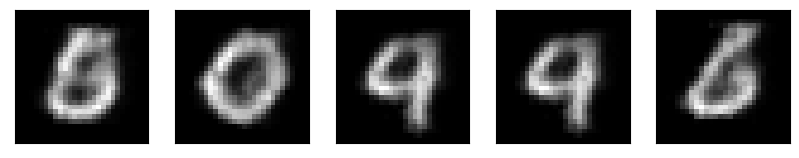

In [ ]:
display([AE.amostra(5)],5)

#Remoção de Ruído

A função ```ruido``` adiciona ruído às imagens de entrada, com intensidade controlada pelo parâmetro intensidade, e, em seguida, garante que os valores resultantes estejam dentro do intervalo válido [0, 1].

In [ ]:
def ruido(imagens):
    intensidade = 0.4
    imagens_ruidosas = imagens + intensidade * np.random.normal(
        loc=0.0, scale=1.0, size=imagens.shape
    )

    return np.clip(imagens_ruidosas, 0.0, 1.0)

Vamos adicionar ruido em nossas imagens

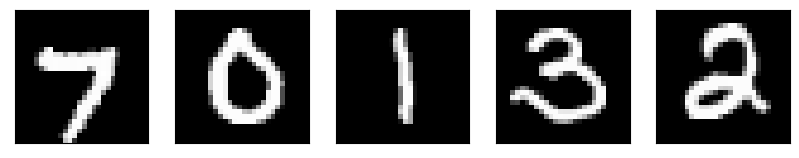

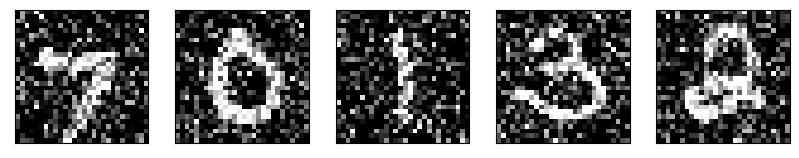

In [ ]:
train_data_ruidoso = ruido(train_data)
test_data_ruidoso = ruido(test_data)

display([train_data, train_data_ruidoso],mostra_imagens)

##AutoEncoder
Vamos utilizar a mesma arquitetura de AutoEncoder, porém vamos "resetar" o seu progresso de aprendizagem

In [ ]:
AE_Ruido = AutoEncoder(dimensoes_imagem, z, 1)

In [ ]:
AE_Ruido.compile(optimizer="adam", loss="binary_crossentropy", metrics=['mae'])

##Treinamento do modelo

In [ ]:
AE_Ruido.fit(
    x=train_data_ruidoso,
    y=train_data,
    epochs=50,
    batch_size=128,
    shuffle=True,
    validation_data=(test_data_ruidoso, test_data),
)

Epoch 1/50
469/469 [==============================] - 2s 4ms/step - loss: 0.2481 - mae: 0.1374 - val_loss: 0.2096 - val_mae: 0.1172
Epoch 2/50
469/469 [==============================] - 1s 3ms/step - loss: 0.2017 - mae: 0.1111 - val_loss: 0.1928 - val_mae: 0.1053
Epoch 3/50
469/469 [==============================] - 1s 3ms/step - loss: 0.2001 - mae: 0.1084 - val_loss: 0.1894 - val_mae: 0.1021
Epoch 4/50
469/469 [==============================] - 1s 3ms/step - loss: 0.1861 - mae: 0.1003 - val_loss: 0.1811 - val_mae: 0.0955
Epoch 5/50
469/469 [==============================] - 1s 3ms/step - loss: 0.1833 - mae: 0.0982 - val_loss: 0.1765 - val_mae: 0.0936
Epoch 6/50
469/469 [==============================] - 1s 3ms/step - loss: 0.1893 - mae: 0.1026 - val_loss: 0.1780 - val_mae: 0.0957
Epoch 7/50
469/469 [==============================] - 1s 3ms/step - loss: 0.1792 - mae: 0.0957 - val_loss: 0.1748 - val_mae: 0.0929
Epoch 8/50
469/469 [==============================] - 1s 3ms/step - loss: 0.

##Resultados
As imagens geradas possuem menos ruídos em relação às imagens de entrada

313/313 [==============================] - 1s 2ms/step


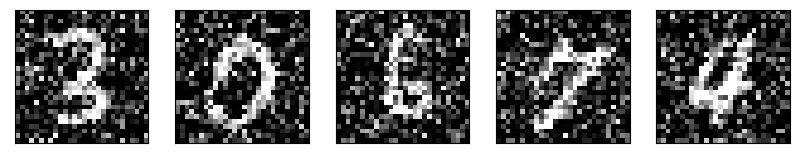

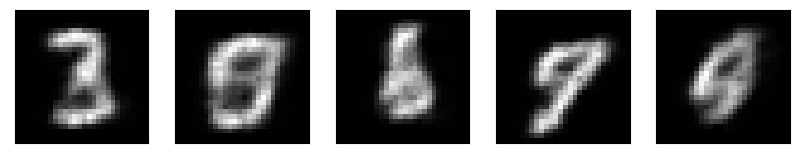

In [ ]:
predictions = AE_Ruido.predict(test_data_ruidoso)

display([test_data_ruidoso, predictions], 5)

#Recolorir imagens
Os autoencoders são capazes de recolorir imagens em tons de cinza através do aprendizado de representações latentes (z) e da associação de padrões visuais a cores. Eles oferecem uma abordagem interessante para a melhoria visual de imagens e podem ser usados em uma variedade de aplicações, como a restauração de fotografias antigas e a criação de versões coloridas de imagens em tons de cinza.

Novas dimensões e novo z, uma vez que vamos usar 3 canais (RGB)

In [ ]:
dimensoes_imagem=(32, 32, 1) #@param
z = 512 #@param

##Carrega o dataset

In [ ]:
from tensorflow.keras.datasets import cifar10

(train_data, train_label), (test_data, test_label) = cifar10.load_data()

##Tons de Cinza
Esta função transforma uma imagem RGB em uma imagem com 3 canais iguais, gerando assim uma imagem com tons de cinza<br>
<a href="https://support.ptc.com/help/mathcad/r9.0/en/index.html#page/PTC_Mathcad_Help/example_grayscale_and_color_in_images.html">The RGB values are converted to grayscale using the NTSC formula: 0.299 ∙ Red + 0.587 ∙ Green + 0.114 ∙ Blue. This formula closely represents the average person's relative perception of the brightness of red, green, and blue light.</a>

In [ ]:
def tons_de_cinza(data):
    cinza = 0.299 * data[..., 0] + 0.587 * data[..., 1] + 0.144 * data[..., 2]
    return cinza

##Organiza o dataset

In [ ]:
train_input_data = preprocessamento(train_data, (32,32,3))
train_output_data = preprocessamento(train_data, (32,32,3))
train_input_data = tons_de_cinza(train_input_data)

test_input_data = preprocessamento(test_data, (32,32,3))
test_output_data = preprocessamento(test_data, (32,32,3))
test_input_data = tons_de_cinza(test_input_data)

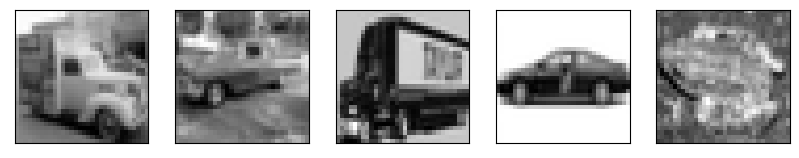

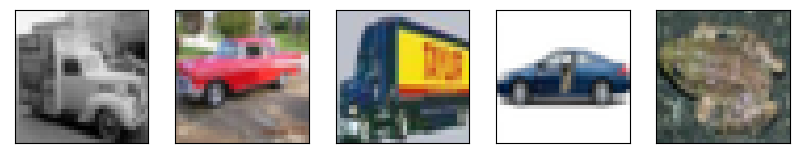

In [ ]:
display([train_input_data, train_output_data], mostra_imagens)

In [ ]:
AE_Colorido = AutoEncoder(dimensoes_imagem, z, 3, 'sigmoid')
AE_Colorido.compile(optimizer="adam", loss="mse", metrics=['mae'])

In [ ]:
AE_Colorido.summary()

Model: "model_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_23 (InputLayer)       [(None, 32, 32, 1)]       0         
                                                                 
 conv2d_33 (Conv2D)          (None, 32, 32, 32)        320       
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 8, 8, 32)         0         
 g2D)                                                            
                                                                 
 flatten_11 (Flatten)        (None, 2048)              0  

##Treina o modelo

In [ ]:
AE_Colorido.fit(
    x=train_input_data,
    y=train_output_data,
    epochs=50,
    batch_size=128,
    shuffle=True,
    validation_data=(test_input_data, test_output_data),
)

Epoch 1/50
391/391 [==============================] - 2s 5ms/step - loss: 0.0240 - mae: 0.1169 - val_loss: 0.0151 - val_mae: 0.0920
Epoch 2/50
391/391 [==============================] - 1s 3ms/step - loss: 0.0137 - mae: 0.0871 - val_loss: 0.0126 - val_mae: 0.0835
Epoch 3/50
391/391 [==============================] - 1s 3ms/step - loss: 0.0119 - mae: 0.0807 - val_loss: 0.0113 - val_mae: 0.0788
Epoch 4/50
391/391 [==============================] - 1s 3ms/step - loss: 0.0110 - mae: 0.0771 - val_loss: 0.0110 - val_mae: 0.0773
Epoch 5/50
391/391 [==============================] - 1s 3ms/step - loss: 0.0104 - mae: 0.0751 - val_loss: 0.0104 - val_mae: 0.0749
Epoch 6/50
391/391 [==============================] - 1s 3ms/step - loss: 0.0100 - mae: 0.0732 - val_loss: 0.0099 - val_mae: 0.0731
Epoch 7/50
391/391 [==============================] - 1s 3ms/step - loss: 0.0097 - mae: 0.0719 - val_loss: 0.0101 - val_mae: 0.0746
Epoch 8/50
391/391 [==============================] - 1s 3ms/step - loss: 0.

##Visualiza o resultado

313/313 [==============================] - 0s 790us/step


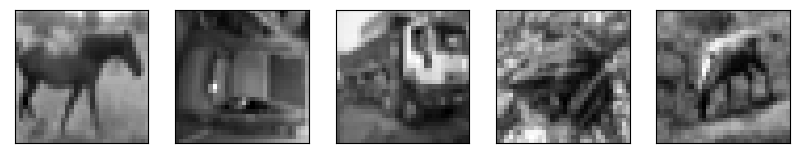

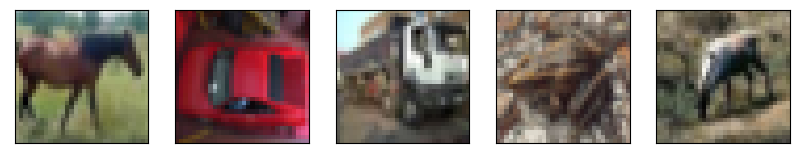

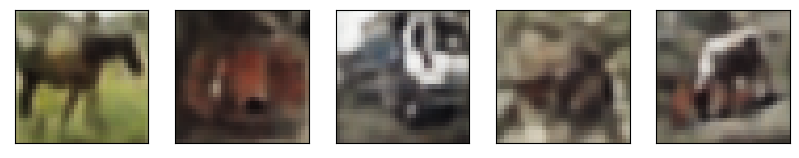

In [ ]:
predictions = AE_Colorido.predict(test_input_data)

display([test_input_data, test_output_data, predictions], 5)